In [1]:
### Машинное обучение: Анализ датасета
### Я беру датасет пассажиров печально известного "Титаника", который затонул в ночь с 14 на 15 апреля 1912, 
### поэтому здесь представлены реальные данные
### Данный датасет можно найти в свободном доступе в Интернете, в нашем случае я взял его с GitHub

In [2]:
### PassengerId (Номер пассажира)(целочисленный): Порядковый номер, присваемаевый каждому пассажиру
### Survived (Выжил)(целочисленный): Показатель, указывающий, выжил ли пассажир (0 - не выжил, 1 - выжил).
### Pclass (Класс пассажира)(целочисленный): Показатель социально-экономического статуса пассажира (1 - высший класс, 2 - средний класс, 3 - нижний класс).
### Name (Имя)(строковый): Имя пассажира.
### Sex (Пол)(строковый): Пол пассажира.
### Age (Возраст)(целочисленный): Возраст пассажира.
### SibSp (Количество братьев, сестер, супругов на борту)(целочисленный): Количество ближайших родственников (братьев, сестер, супругов) пассажира на борту Титаника.
### Parch (Количество родителей, детей на борту)(целочисленный): Количество родителей и детей пассажира на борту Титаника.
### Ticket (Билет)(строковый): Номер билета.
### Fare (Тариф)(числовой с плавающей точкой): Плата за проезд.
### Cabin (Каюта)(строковый): Номер каюты пассажира.
### Embarked (Порт посадки)(строковый): Порт, в котором пассажир сел на борт (C - Шербур, Франция; Q - Квинстаун, Ирландия; S - Саутгемптон, Англия).

In [24]:
### 1. Для каждого атрибута нужно определить:
###  a.	среднее значение, ско
### b.	построить гистограмму распределения значений, определить есть ли выбросы 
###  c.	есть ли пропущенные значение, сколько
###  d.	предложить вариант обработки пропущенных значений
### 2. Определить корреляцию между параметрами
###  a.	какие атрибуты высококоррелированы, определить характер корреляции 
###  b.	какие атрибуты не имеют корреляцию
###  c.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)
###  d.	проанализируйте полученные результаты.


In [25]:
#Загружаем данные из датасета
import pandas as pd

tit_data = pd.read_csv('titanic.csv')
tit_data.head(7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S

In [26]:
#Выбираем данные только с целочисленным и числовым с плавающей точкой типами
numeric_columns = tit_data.select_dtypes(include=[float, int])
#Вычисляем средние значения и ско
mean_values = numeric_columns.mean(skipna=True)
std_values = numeric_columns.std(skipna=True)

#Средние значения
print(mean_values)
#Средне квадратичные отклонения
print(std_values)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64
PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [28]:
#Подсчитываем пустые ячейки по атрибутам
tit_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Как можно заметить, у нас есть пропущенные значения в следующих атрибутах: Age, Cabin и Embarked
# Есть множество способов обработать пропущенные значения, такие как заменить на средние значения, медиану, моду
# Например, замена пропущенных значений в столбце "Age" на медиану
# median_age = data['Age'].median()
# data['Age'].fillna(median_age, inplace=True)
# В "Embarked" можно поменять на часто встречающиеся значения и все
# Атрибут "Cabin" не вызывает интереса в рамках нашей задачи

<AxesSubplot:xlabel='Survived', ylabel='count'>

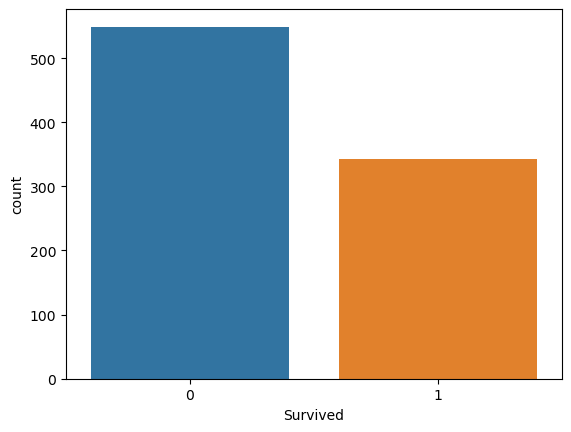

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='Survived', data=tit_data)

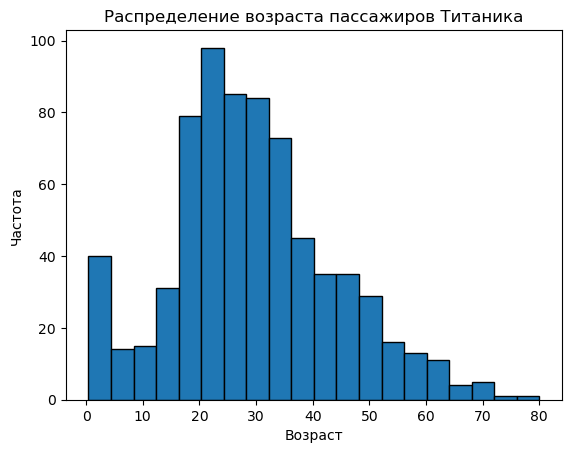

In [53]:
# Построение гистограммы для столбца "Age"
plt.hist(tit_data['Age'], bins=20, edgecolor='black')

# Настройка заголовка и меток осей
plt.title('Распределение возраста пассажиров Титаника')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Отображение гистограммы
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

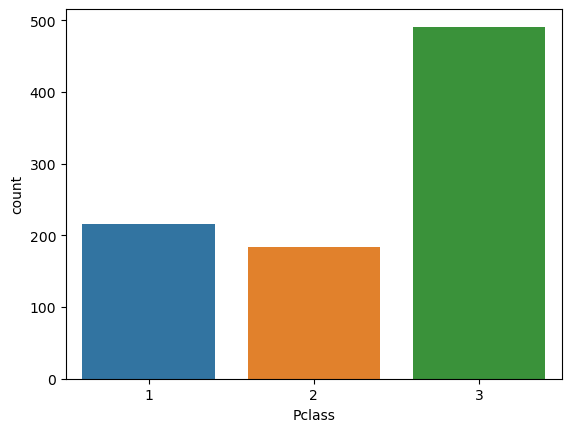

In [48]:
# Построение гистограммы для столбца "Pclass"
sns.countplot(x='Pclass', data=tit_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

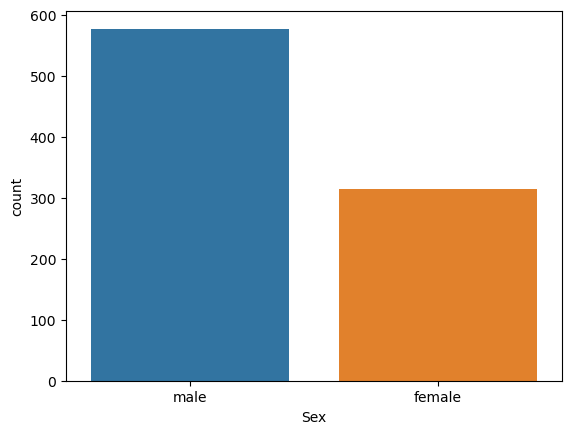

In [49]:
# Построение гистограммы для столбца "Sex"
sns.countplot(x='Sex', data=tit_data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

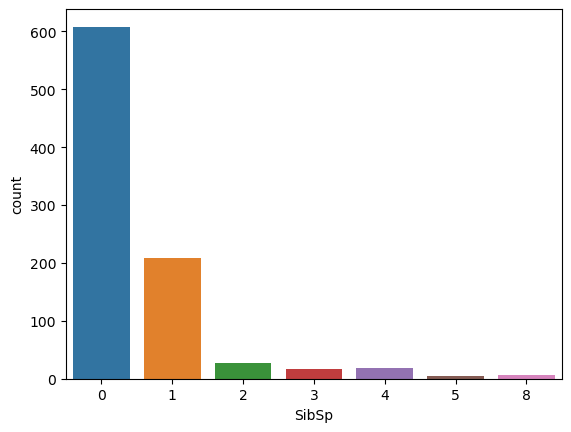

In [50]:
# Построение гистограммы для столбца "SibSp"
sns.countplot(x='SibSp', data=tit_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

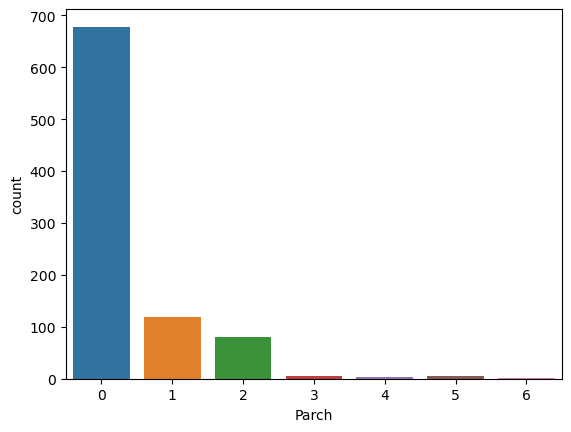

In [51]:
# Построение гистограммы для столбца "Parch"
sns.countplot(x='Parch', data=tit_data)

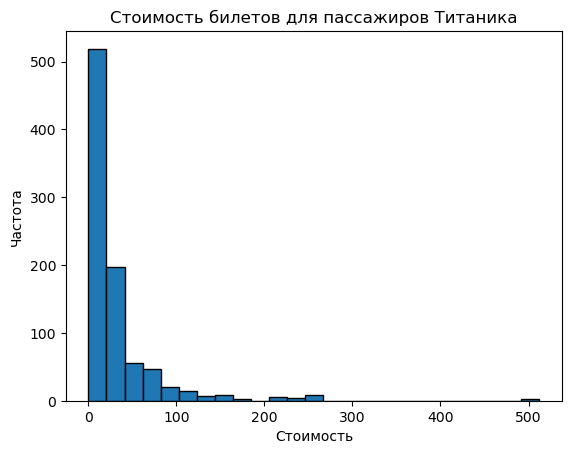

In [56]:
# Построение гистограммы для столбца "Fare"
plt.hist(tit_data['Fare'], bins=25, edgecolor='black')

plt.title('Стоимость билетов для пассажиров Титаника')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

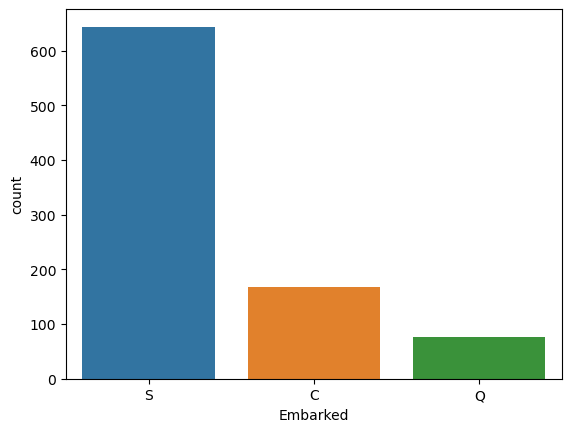

In [57]:
# Построение гистограммы для столбца "Embarked"
sns.countplot(x='Embarked', data=tit_data)

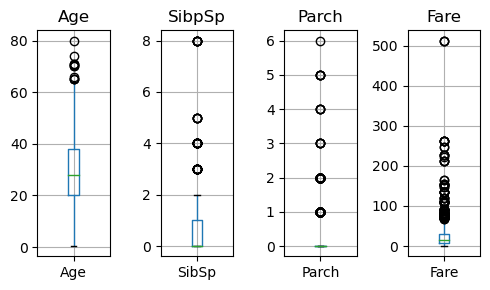

In [41]:
# Визуализация выбросов
plt.figure(figsize=(5, 3))

plt.subplot(1, 4, 1)
tit_data.boxplot(column='Age')
plt.title('Age')

plt.subplot(1, 4, 2)
tit_data.boxplot(column='SibSp')
plt.title('SibpSp')

plt.subplot(1, 4, 3)
tit_data.boxplot(column='Parch')
plt.title('Parch')

plt.subplot(1, 4, 4)
tit_data.boxplot(column='Fare')
plt.title('Fare')

# Отображение графиков
plt.tight_layout()
plt.show()


          Survived       Age      Fare    Pclass
Survived  1.000000 -0.077221  0.257307 -0.338481
Age      -0.077221  1.000000  0.096067 -0.369226
Fare      0.257307  0.096067  1.000000 -0.549500
Pclass   -0.338481 -0.369226 -0.549500  1.000000


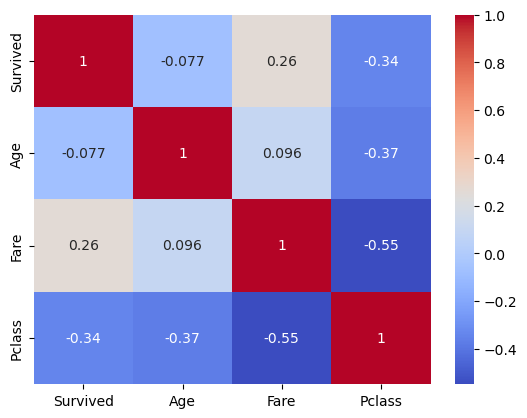

In [62]:
#Определяю корреляцию между параметрами
correlation_matrix = tit_data[['Survived', 'Age', 'Fare', 'Pclass']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Функция corr() не может работать с данными строкового типа. 
# В данном случае, в tit_data есть столбцы, содержащие имена пассажиров, их пол, билет, кабину и порт.

In [61]:
# Интерпретация результатов: 
#При подсчете коэффициента корреляции, 
#значение  от 0,7 до 1 по модулю указывает на сильную корреляцию. 
#Значения от 0,3 до 0,7 по модулю обычно говорят об умеренной корреляции. 
#Менее 0,3 по модулю свидетельствует о слабой корреляции. 

# Характер корреляции: 
#Survived-Age: ~ (-0.077) слабая обратная зависимость
#Survived-Fare: ~ 0.257 слабая прямая зависимость
#Survived-Pclass: ~ (-0.338) умеренная обратная зависимость
#Age-Fare: ~ 0,096 слабая прямая зависимость
#Age-Pclass: ~ (-0.369) умеренная обратная зависимость
#Fare-Pclass: ~ (-0.550) умеренная обратная зависимость

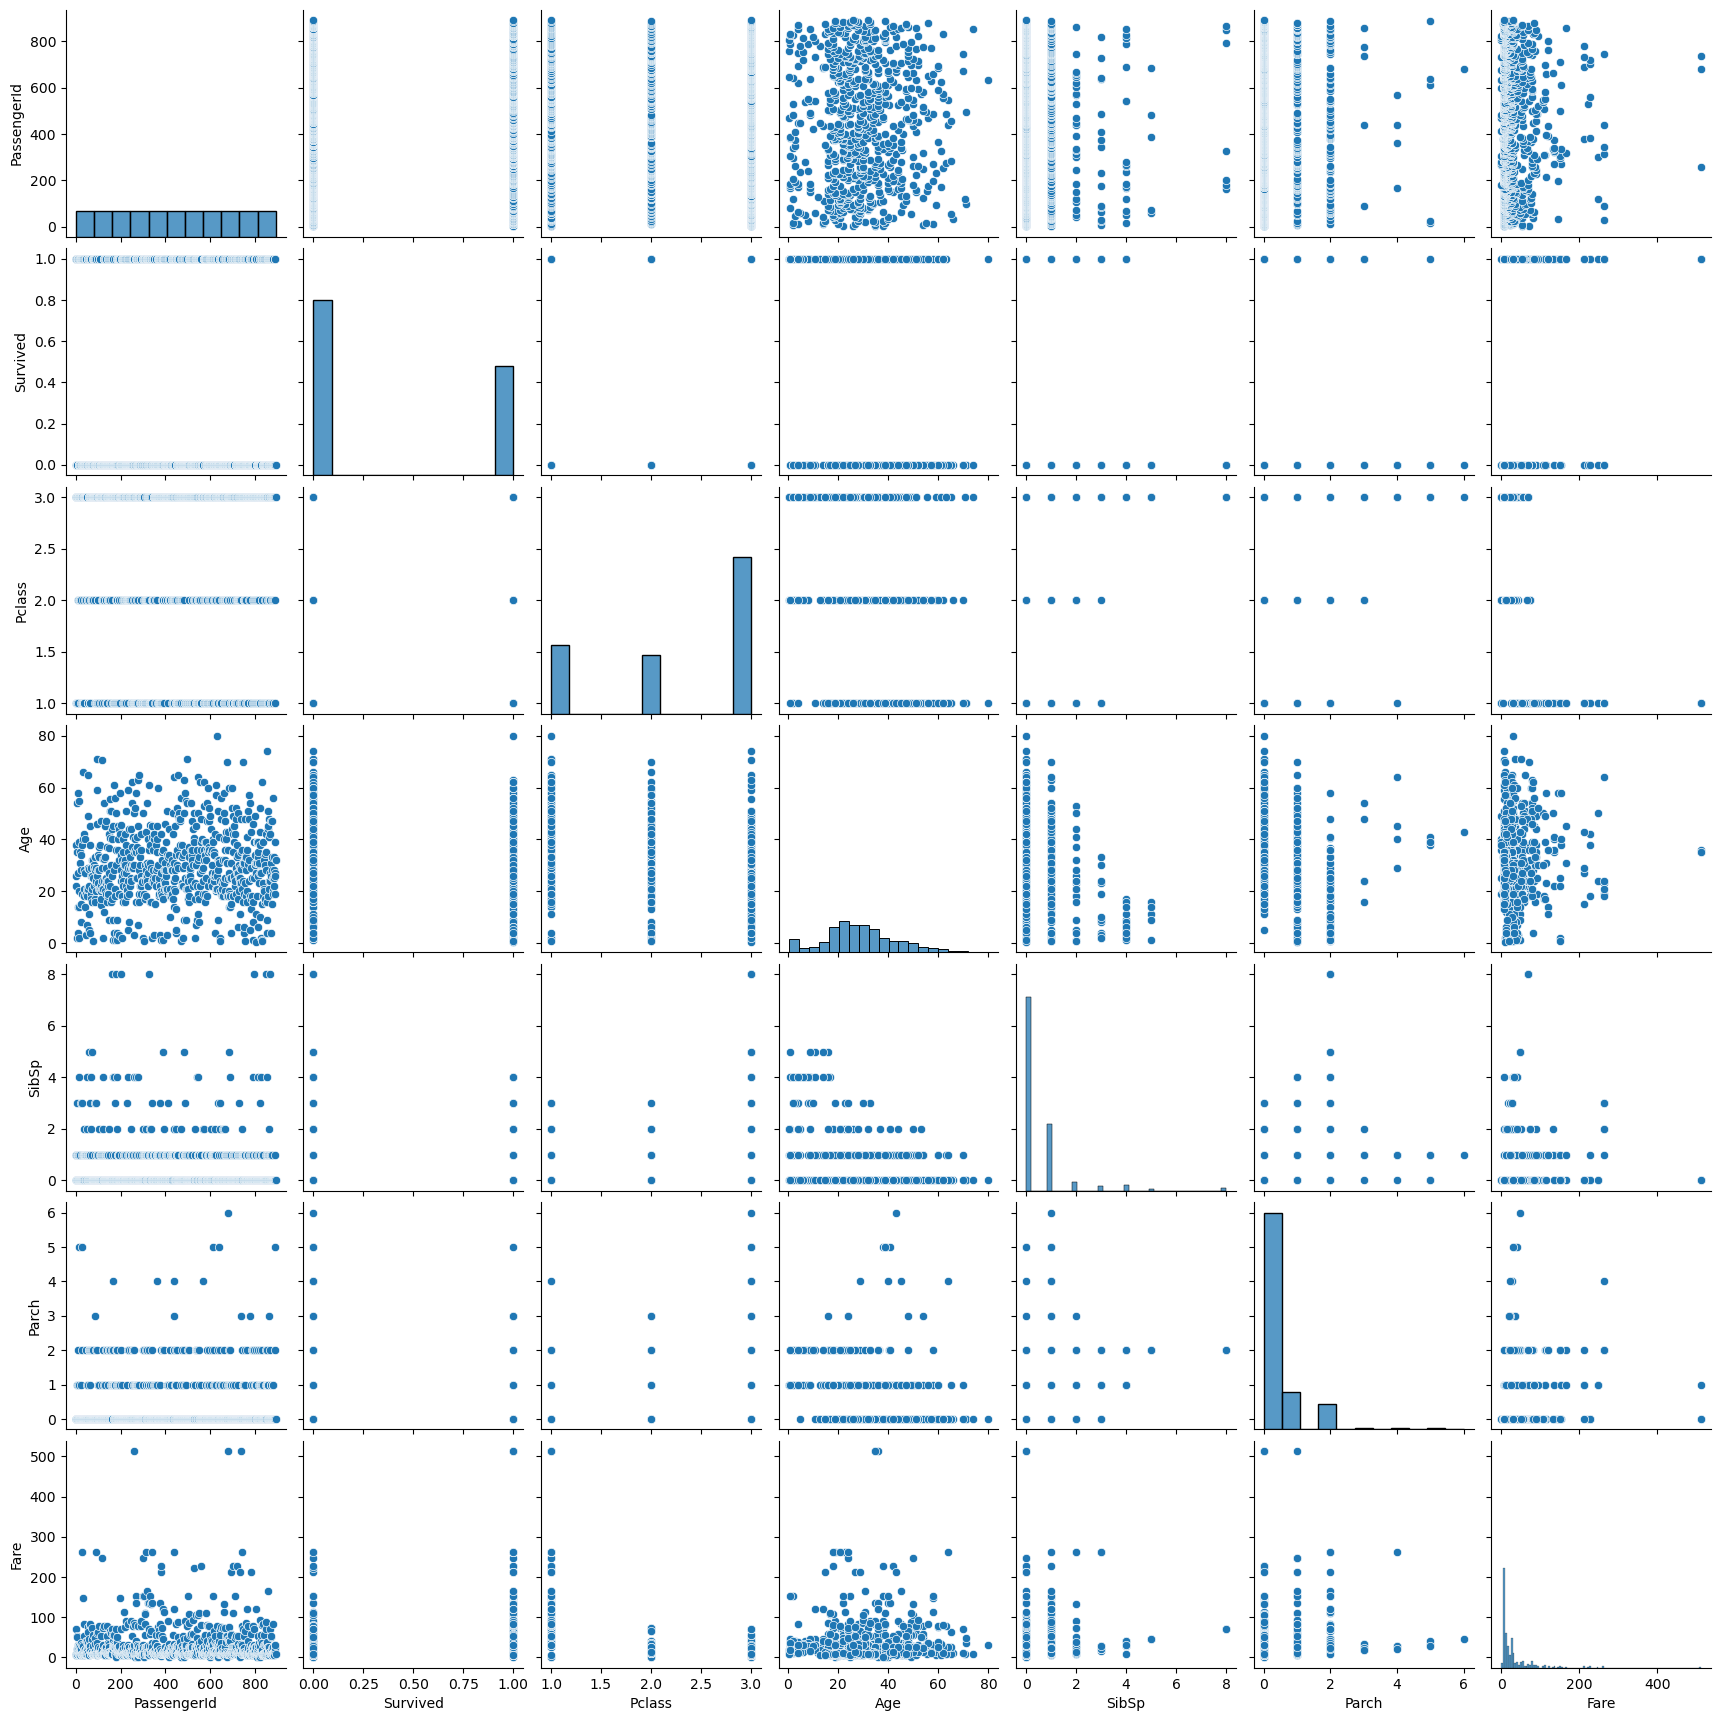

In [64]:
#Построение графиков рассеивания
sns.pairplot(tit_data)

In [67]:
# При визуальном анализе графика рассеивания на предмет корреляции, необходимо помнить о следующих вещах:
# 1. Если между двумя атрибутами существует сильная положительная корреляция, изменение одного атрибута будет приводить к изменению другого атрибута в том же направлении.
# 2. Если между двумя атрибутами существует сильная отрицательная корреляция, изменение одного атрибута будет приводить к изменению другого атрибута в противоположном направлении.
# 3. Если атрибуты не имеют корреляции или имеют слабую корреляцию, изменение одного атрибута не будет существенно влиять на другой атрибут, т.е. нельзя визуально выделить тренд изменения.

# Я буду описывать именно те пары атрибутов, где можно проследить хоть какую-либо корреляцию.

# Какие выводы мы можем сделать:
# 1. Survived: можно наблюдать слабую обратную зависимость с Age;
# 2. Age: можно наблюдать умеренную обратную зависимость с SibSp и Parch;
# 3.  SibSp: можно наблюдать слабую обратную зависимость с Fare;
# 4. Parch: можно наблюдать слабую обратную зависимость с Fare;

# Если в качестве вывода мы должны показать, у кого больше шансов выжить, то результаты на данной выборке (которая не является полной, судя по сторонним данным) такие:
# Шансов выжить больше оказалось у тех, кто больше заплатил и у кого выше класс пассажира (премиум гости выживали чаще)
# Также можно рассмотреть и то, что у более старшего поколения чуть меньше оказалось шансов выжить - вероятно, из-за сниженных физических способностей